# Covariance and Principal Component Analysis (PCA)

Import statements

In [99]:
import numpy as np
import matplotlib.pyplot as plt

## Implementation

This implementation of PCA is based off of the paper below.

https://arxiv.org/pdf/1404.1100.pdf

We start by writing some general python code to compute principle components of a set of measurements. We can write a function that performs PCA through the following steps. First center the data around 0 by subtracting the mean of each sample from each row. We then calculate the covariance matrix using np.cov(). Finally, we return the eigenvalues, which illustrate how much each principal copmonent corresponds to the variance, and the eigenvectors, which are the new principal components that maximize SNR.

In [100]:
def principal_component_analysis(input_data):
    '''
    Performs PCA on input dataset
    
    Parameters:
        input_data: m x n matrix of data, where m is the number of measurement types and n is the number of samples
    
    Returns:
        diag: Diagonal matrix of eigenvalues ordered in decreasing order correspond to importance of PC
        eigenvectors: Principal components
    '''
    # Center the measurements around 0
    num_types = np.shape(input_data)[0]
    centered_data = input_data - np.identity(num_types) * np.mean(input_data, axis=1) @ np.ones_like(input_data)
    
    # Calculate the covariance
    covariance = np.cov(centered_data)
    
    # Calculate the eigenvalues and eigenvectors (principal components)
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    diag = eigenvalues * np.identity(len(eigenvalues))
    return diag, eigenvectors

## Toy Example

Trying this code on a simple simulated data set we have the following. In the following code, we randomly generate data that correlates to the line $y = 0.8x$ using some random variation to introduce error into the measurements.

Diagonal Matrix: 
 [[1.97479976 0.        ]
 [0.         0.13016856]]
Principal Components: 
 [[-0.61363911 -0.78958663]
 [-0.78958663  0.61363911]]


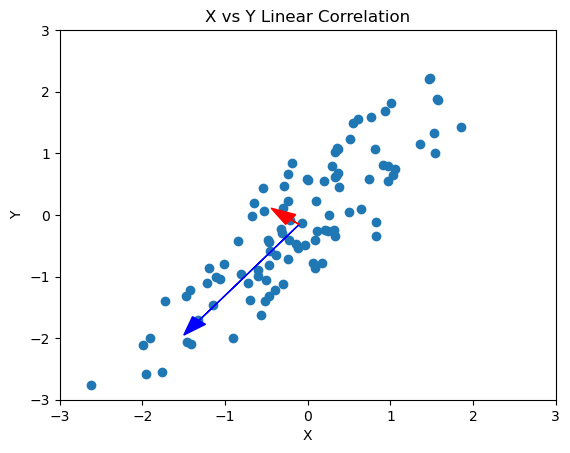

In [101]:
RANDOM_FACTOR = 1.2
SLOPE = 0.8

# Set the random seed for reproducibility
np.random.seed(42)

def generate_linear_correlation(size):
    '''
    Produces linear correlation data
    
    Parameters:
        size: Size of sample set
        
    Returns:
        2-D array of X, Y linear correlation set
    '''
    slope = SLOPE
    data = np.empty((2, size))
    data[0] = np.random.randn(size)
    data[1] = data[0] + RANDOM_FACTOR * (np.random.rand(size) - np.random.rand(size))
    return data

# Perform PCA analysis
data = generate_linear_correlation(100)
diag, eigenvectors = principal_component_analysis(data)
print(f'Diagonal Matrix: \n {diag}')
print(f'Principal Components: \n {eigenvectors}')

# Plot scatter plot of original data
fig, ax = plt.subplots()
plt.scatter(data[0], data[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y Linear Correlation')

# Plot principal components
arrow_x = np.mean(data[0])
arrow_y = np.mean(data[1])
ax.arrow(arrow_x, arrow_y, diag[0][0] * eigenvectors[0][0], diag[0][0] * eigenvectors[1][0], head_width=0.2, head_length=0.3, fc='blue', ec='blue')
ax.arrow(arrow_x, arrow_y, diag[1][1] * eigenvectors[0][1], diag[1][1] * eigenvectors[1][1], head_width=0.2, head_length=0.3, fc='red', ec='red')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
plt.show()


As shown in the graph above, our PCA function returns the first principal component $-0.61363911x -0.78958663y$, which maximizes the variance, and the second principal component $-0.78958663x + 0.61363911y$, which is orthogonal to the first. Since the first eigenvalue is over 15 times larger than the second eigenvalue, we know that the first principal component is much more significant to variance compared to the second, indicating that it is possible to reduce the number of dimensions measured from 2 to 1.

## Higher Dimensions

We now simulate a higher dimensional dataset using the three camera problem (with errors) discussed in the paper above. In the following code, the three camera problem is simulated with some small variation. We recorded the time series for a mass attached to a spring with mass $m = 5$ and spring constant $k = 10$ oscillating in the $x$ direction with some added randomness in the $x, y,$ and $z$ directions. We then project this data onto the bases for the cameras and perform PCA on the 6 dimensional dataset.

Diagonal Matrix: 
 [[ 3.12198105e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  1.52342161e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.46626205e-01  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.41649158e-13
  -0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.71547626e-15 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -7.28958480e-14]]
Principal Components: 
 [[-0.12590524  0.83424642 -0.32590766  0.29447659 -0.15108841  0.19581161]
 [ 0.06286078 -0.14503093 -0.25473712 -0.35832167 -0.83657779 -0.24409296]
 [ 0.00090148 -0.09439493 -0.85049462 -0.1644611   0.27458098 -0.25779173]
 [-0.44103718 -0.18681953  0.0139677   0.65329864 -0.40942533 -0.58124329]
 [-0.88196244  0.01292704  0.05263761 -0.43249307 

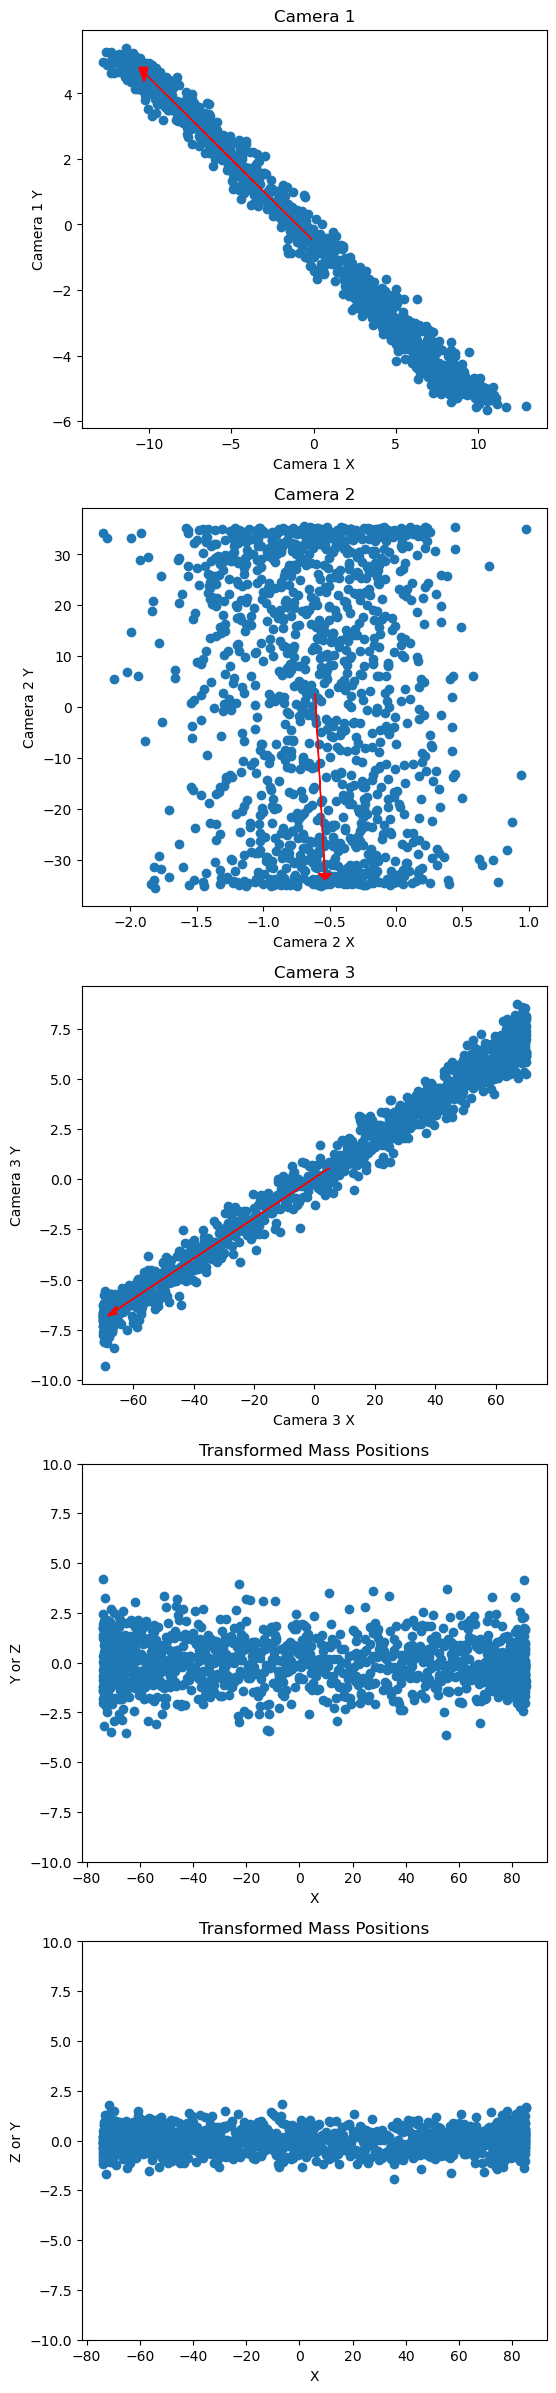

In [102]:
# Experimental constants
k = 10
m = 5

# Camera bases
CAMERA1 = np.array([[1, 10, -2], [-0.5, -1, 2]])
CAMERA2 = np.array([[-0.01, 1, 5], [3.5, -2, 1]])
CAMERA3 = np.array([[7, 0.2, 0.1], [0.7, -4.6, 4]])

def init_camera_data(duration):
    '''
    Generates time series for mass attached to spring with some slight variation
    
    Parameters:
        duration: Length of time
        
    Returns:
        Actual position data in experimental frame.
    '''
    np.random.seed(36)
    time = np.arange(0, duration, 1/120)
    size = int(duration * 120)
    data = np.empty((3, size))
    data[0] = 10 * np.cos(np.sqrt(k / m) * time) + 0.01 * (np.random.randn() - 0.5)
    data[1] = 0.1 * np.random.randn(size) - 0.1
    data[2] = 0.1 * np.random.randn(size) - 0.1
    return data

def simulate_camera(actual_positions, camera1, camera2, camera3):
    camera1_data = camera1 @ actual_positions
    camera2_data = camera2 @ actual_positions
    camera3_data = camera3 @ actual_positions
    return np.vstack((camera1_data, camera2_data, camera3_data))

# Perform PCA analysis
actual_positions = init_camera_data(10)
camera_data = simulate_camera(actual_positions, CAMERA1, CAMERA2, CAMERA3)
diag, eigenvectors = principal_component_analysis(camera_data)
print(f'Diagonal Matrix: \n {diag}')
print(f'Principal Components: \n {eigenvectors}')

# Plot scatter plot of original data
fig, axes = plt.subplots(5, 1, figsize=(6, 30))
for i in range(0, 3):
    axes[i].scatter(camera_data[2 * i], camera_data[2 * i + 1])
    axes[i].set_xlabel(f'Camera {i + 1} X')
    axes[i].set_ylabel(f'Camera {i + 1} Y')
    axes[i].set_title(f'Camera {i + 1}')

# Plot first principal component
arrow_pos = np.mean(camera_data, axis=1)
axes[0].arrow(arrow_pos[0], arrow_pos[1], 80 * eigenvectors[0][0], 80 * eigenvectors[1][0], head_width=0.5, head_length=0.5, fc='red', ec='red')
axes[1].arrow(arrow_pos[2], arrow_pos[3], 80 * eigenvectors[2][0], 80 * eigenvectors[3][0], head_width=0.1, head_length=1.2, fc='red', ec='red')
axes[2].arrow(arrow_pos[4], arrow_pos[5], 80 * eigenvectors[4][0], 80 *eigenvectors[5][0], head_width=0.4, head_length=3, fc='red', ec='red')

# Plot transformed data
axes[3].scatter(pca_data[0], pca_data[1])
axes[3].set_xlabel('X')
axes[3].set_ylabel('Y or Z')
axes[3].set_title('Transformed Mass Positions')
axes[3].set_ylim([-10, 10])
axes[4].scatter(pca_data[0], pca_data[2])
axes[4].set_xlabel('X')
axes[4].set_ylabel('Z or Y')
axes[4].set_title('Transformed Mass Positions')
axes[4].set_ylim([-10, 10])
plt.show()

As shown in the plot above, the only significant eigenvalue is the first one, which is significantly larger than all the others. Therefore, only the first principal component $-0.12590524x_1 + 0.83424642x_2 -0.32590766x_3 + 0.29447659x_4 -0.15108841x_5 + 0.19581161x_6$, which is plotted on the three graphs, is the only one that matters. When the data is projected onto the eigenvector basis, we can see that the data fits neatly along a single direction (the $x$ direction), as was expected. Furthermore, we can also see that the second and third components of the transformed data also correspond to either the $y$ or $z$ error included in the original data collected (these are the last two plots shown).